[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-examples/blob/master/chainer_PotatoChips_Classification_SSD.ipynb)

In [0]:
import argparse
import matplotlib.pyplot as plt

import chainer

#from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv.links import SSD512
from chainercv import utils
from chainercv.visualizations import vis_bbox

In [0]:
#voc_bbox_label_names = (
#    'うすしお味BIGBAG','うすしお味LサイズBIG','うすしお味ノーマル',
#    'コンソメパンチ味ノーマル','コンソメパンチ味LサイズBAG','コンソメパンチ味BIGBAG',
#    '九州しょうゆ味BIGBAG','九州しょうゆ味LサイズBAG','九州しょうゆ味ノーマル')

voc_bbox_label_names = (
    '0','1','2',
    '3','4','5',
    '6','7','8')


In [7]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving 4901330502911_1_D30_045.jpg to 4901330502911_1_D30_045.jpg
Saving 4901330502911_1_D30_060.jpg to 4901330502911_1_D30_060.jpg
Saving 4901330502911_1_D30_075.jpg to 4901330502911_1_D30_075.jpg
Saving 4901330502911_1_D30_090.jpg to 4901330502911_1_D30_090.jpg
Saving 4901330502911_1_D30_105.jpg to 4901330502911_1_D30_105.jpg
Saving 4901330502911_1_D30_120.jpg to 4901330502911_1_D30_120.jpg
Saving 4901330502911_1_D30_135.jpg to 4901330502911_1_D30_135.jpg
Saving 4901330502911_1_D30_150.jpg to 4901330502911_1_D30_150.jpg
Saving 4901330502911_1_D30_165.jpg to 4901330502911_1_D30_165.jpg
Saving 4901330502911_1_D30_180.jpg to 4901330502911_1_D30_180.jpg
Saving 4901330502911_1_D30_195.jpg to 4901330502911_1_D30_195.jpg


In [8]:
!ls -l

total 6341340
-rw-r--r-- 1 root root     191351 Aug 15 12:37 4901330502911_1_D30_045.jpg
-rw-r--r-- 1 root root     163714 Aug 15 12:37 4901330502911_1_D30_060.jpg
-rw-r--r-- 1 root root     152406 Aug 15 12:37 4901330502911_1_D30_075.jpg
-rw-r--r-- 1 root root     164698 Aug 15 12:37 4901330502911_1_D30_090.jpg
-rw-r--r-- 1 root root     196338 Aug 15 12:37 4901330502911_1_D30_105.jpg
-rw-r--r-- 1 root root     229643 Aug 15 12:37 4901330502911_1_D30_120.jpg
-rw-r--r-- 1 root root     251389 Aug 15 12:37 4901330502911_1_D30_135.jpg
-rw-r--r-- 1 root root     248554 Aug 15 12:37 4901330502911_1_D30_150.jpg
-rw-r--r-- 1 root root     239958 Aug 15 12:37 4901330502911_1_D30_165.jpg
-rw-r--r-- 1 root root     256812 Aug 15 12:37 4901330502911_1_D30_180.jpg
-rw-r--r-- 1 root root     248255 Aug 15 12:37 4901330502911_1_D30_195.jpg
drwxrwxr-x 5 1008 1008       4096 Jun 19 13:19 data
drwxr-xr-x 3 root root       4096 Aug 13 21:16 datalab
-rw-r--r-- 1 root root 3616797934 Aug 15 01:54 data.ta

In [0]:
model = SSD512(n_fg_class=len(voc_bbox_label_names), pretrained_model='./model_potato.npz')
chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

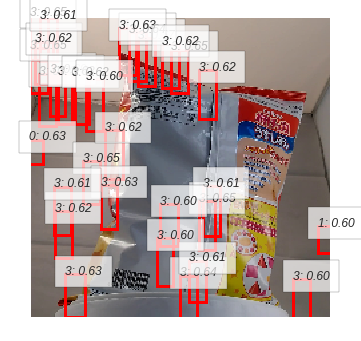

In [14]:
from chainercv.transforms import resize

img = utils.read_image('./4901330502911_1_D30_195.jpg', color=True)
img = resize(img,(224,224))
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.axis("off")
plt.show()